here i used multiple dataframe just to test use just one while cleaning

In [50]:
import pandas as pd

import re

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Kalimati'
mpl.rcParams['font.size'] = 14 

In [2]:
df = pd.read_excel('./final_dataset.xlsx')

In [3]:
df.head()


,मुद्दा,मुद्दा नं,मुद्दाको किसिम,आदेश फैसलाको किसिम,दर्ता मिती,फैसला मिती,मुद्दा समय
0,ज्यान मार्ने उद्योग,068-CR-0401,फौजदारी,उल्टि,2068-03-02 00:00:00,2070-01-02 00:00:00,671
1,जगा खिचोला घ.उ.च,065-CI-0900,देवानी,पक्षको कानुन व्यवसायी बाट / सदर,2066-03-22 00:00:00,2072-03-16 00:00:00,2186
2,"अशं चलन, अशंबण्डा",069-RI-0723,देवानी,तामेली,2069-08-07 00:00:00,2070-08-18 00:00:00,376
3,लेनदेन,069-RI-0484,देवानी,तामेली,2069-06-15 00:00:00,2070-03-28 00:00:00,286
4,लेनदेन,068-RI-1497,देवानी,तामेली,2068-11-03 00:00:00,2070-12-11 00:00:00,768


In [4]:
df['मुद्दा'].unique()

array(['ज्यान मार्ने उद्योग', 'जगा खिचोला घ.उ.च', 'अशं चलन, अशंबण्डा',
       'लेनदेन ', 'लेनदेन \xa0', 'कित्ता काट दर्ता', 'वैदेशिक रोजगार ठगी',
       'लिखत र्दता वदर र्दता', 'उत्प्रेषण \xa0', 'उत्प्रेषण', 'विविध',
       'परमादेश \xa0', 'आयकर', 'अदालतको अवहेलना', 'निषेधाज्ञा',
       'मुल्य अभिवृद्धी कर', 'नेपाली नागरिकता हटाउने', 'लुटपिट',
       'अंश नामसारी', 'लिखत वदर', 'हक कायम समेत', 'हक कायम', 'जालसाजी',
       'हक कायम लि.द.व.समेत', 'अपुताली हक कायम', 'निर्णय वदर',
       'लागु आैषध विक्रि वितरण', 'फैसला वदर', 'अशं हक कायम मिलापत्र वदर',
       'अशं चलन मिलापत्र वदर', 'कर्तव्य ज्यान', 'जवरजस्ती करणी',
       'लिखत दर्ता वदर', 'अंश हक कायम दर्ता नामसारी समेत',
       'अंश हक कायम दर्ता नामसारी', 'नागरिकता सम्बन्धी', 'उत्प्रेषण समेत',
       'जगा खिचोला।', 'र.पा.दा.खा.वदर', 'नामसारी हक कायम समेत', 'परमादेश',
       'साधारण चोरी', 'चोरी', 'बन्दीप्रत्यक्षीकरण', 'नक्कली प्रमा०ा पत्र',
       'वकसपत्र लिखत दर्ता वदर', 'हातहतियार खरखजाना',
       'निर्णय वदर द.स्रेस्ता वदर समेत', '

In [5]:
df['मुद्दा नं'].nunique()

262

In [6]:
df['मुद्दा'].nunique()

94

In [7]:
df['मुद्दाको किसिम'].unique()

array(['फौजदारी', 'देवानी', 'रिट निवेदन', 'रिट निवेदन\xa0',
       'फुटकर निवेदन', 'फौजदारी\xa0\xa0', 'फौजदारी\xa0',
       'रिट निवेदन\xa0\xa0', 'फौजदारी \xa0', 'रिट पुनरावलोकन\xa0',
       'फुटकर निवेदन\xa0', 'निवेदन'], dtype=object)

In [8]:
df['मुद्दाको किसिम'].nunique()

12

## clean _मुद्दाको किसिम_ column

In [45]:
df_clean = df.copy()

In [46]:
df.head()

,मुद्दा,मुद्दा नं,मुद्दाको किसिम,आदेश फैसलाको किसिम,दर्ता मिती,फैसला मिती,मुद्दा समय
0,ज्यान मार्ने उद्योग,068-CR-0401,फौजदारी,उल्टि,2068-03-02 00:00:00,2070-01-02 00:00:00,671
1,जगा खिचोला घ.उ.च,065-CI-0900,देवानी,पक्षको कानुन व्यवसायी बाट / सदर,2066-03-22 00:00:00,2072-03-16 00:00:00,2186
2,"अशं चलन, अशंबण्डा",069-RI-0723,देवानी,तामेली,2069-08-07 00:00:00,2070-08-18 00:00:00,376
3,लेनदेन,069-RI-0484,देवानी,तामेली,2069-06-15 00:00:00,2070-03-28 00:00:00,286
4,लेनदेन,068-RI-1497,देवानी,तामेली,2068-11-03 00:00:00,2070-12-11 00:00:00,768


In [47]:
case_types = ['फौजदारी', 'देवानी', 'रिट निवेदन', 'फुटकर निवेदन', 'रिट पुनरावलोकन', 'निवेदन']

for case in case_types:
    df_clean['मुद्दाको किसिम'] = df_clean['मुद्दाको किसिम'].apply(lambda x: re.sub(rf'^{case}.*', case, str(x)))

df_clean.to_excel('cleaned_dataset.xlsx', index=False)

    

In [48]:
df_clean = pd.read_excel('./cleaned_dataset.xlsx')
df_clean.head()

,मुद्दा,मुद्दा नं,मुद्दाको किसिम,आदेश फैसलाको किसिम,दर्ता मिती,फैसला मिती,मुद्दा समय
0,ज्यान मार्ने उद्योग,068-CR-0401,फौजदारी,उल्टि,2068-03-02 00:00:00,2070-01-02 00:00:00,671
1,जगा खिचोला घ.उ.च,065-CI-0900,देवानी,पक्षको कानुन व्यवसायी बाट / सदर,2066-03-22 00:00:00,2072-03-16 00:00:00,2186
2,"अशं चलन, अशंबण्डा",069-RI-0723,देवानी,तामेली,2069-08-07 00:00:00,2070-08-18 00:00:00,376
3,लेनदेन,069-RI-0484,देवानी,तामेली,2069-06-15 00:00:00,2070-03-28 00:00:00,286
4,लेनदेन,068-RI-1497,देवानी,तामेली,2068-11-03 00:00:00,2070-12-11 00:00:00,768


In [49]:
df_clean['मुद्दाको किसिम'].nunique()

6

In [52]:
case_type_counts = df_clean['मुद्दाको किसिम'].value_counts()

case_types = case_type_counts.index
values = case_type_counts.values

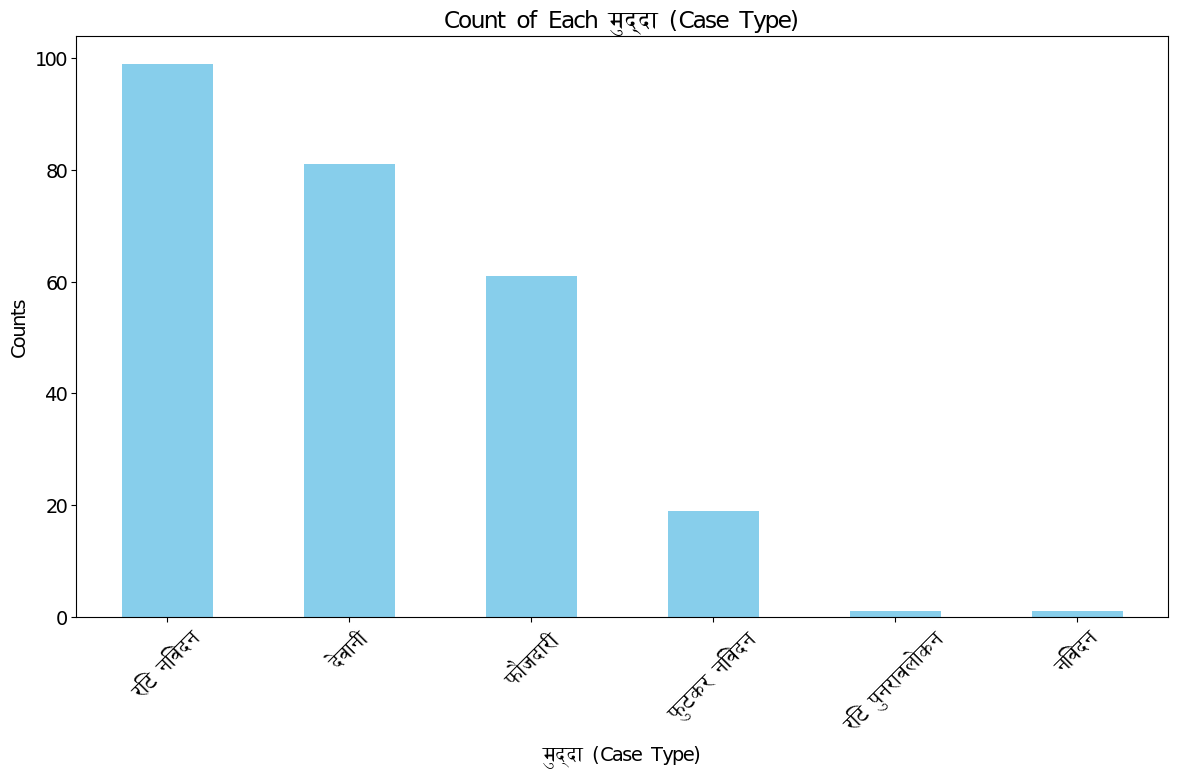

In [56]:
plt.figure(figsize=(12, 8))  #
case_type_counts.plot(kind='bar', color='skyblue')  
plt.title('Count of Each मुद्दा (Case Type)')
plt.xlabel('मुद्दा (Case Type)')
plt.ylabel('Counts')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

## clean _मुद्दा_ column

In [140]:
df_clean_case = pd.read_excel('./updated_dataset_case.xlsx')

In [141]:
df_clean_case['मुद्दा'].nunique()

91

In [162]:
df_clean_case['मुद्दा'].nunique()

91

In [169]:
filtered_data = df_clean_case[df_clean_case['मुद्दा'].str.contains('लेनदेन', na=False)]

number_of_entries = filtered_data['मुद्दा'].count()
number_of_entries

2

In [163]:
data = ['परमादेश', 'उत्प्रेषण', 'जगा खिचोला', 'कर्तव्य ज्यान']

In [171]:
# df_clean_case['मुद्दा'] = df_clean_case['मुद्दा'].str.replace(r'^उत्प्रेषण \xa0.*', 'उत्प्रेषण')
# df_clean_case['मुद्दाको किसिम'] = df['मुद्दाको किसिम'].apply(lambda x: re.sub(r'^उत्प्रेषण समेत.*', 'उत्प्रेषण', str(x)))
df_clean_case['मुद्दा'] = df_clean_case['मुद्दा'].apply(lambda x: 'लेनदेन' if re.search(r'लेनदेन\s*', x) else x)
df_clean_case.to_excel('updated_dataset_case.xlsx', index=False)

In [172]:
df_clean_case = pd.read_excel('updated_dataset_case.xlsx')
df_clean_case['मुद्दा'].nunique()

88

In [173]:
df_clean_case['मुद्दा'].unique()

array(['ज्यान मार्ने उद्योग', 'जगा खिचोला घ.उ.च', 'अशं चलन, अशंबण्डा',
       'लेनदेन', 'कित्ता काट दर्ता', 'वैदेशिक रोजगार ठगी',
       'लिखत र्दता वदर र्दता', 'उत्प्रेषण', 'विविध', 'परमादेश', 'आयकर',
       'अदालतको अवहेलना', 'निषेधाज्ञा', 'मुल्य अभिवृद्धी कर',
       'नेपाली नागरिकता हटाउने', 'लुटपिट', 'अंश नामसारी', 'लिखत वदर',
       'हक कायम समेत', 'हक कायम', 'जालसाजी', 'हक कायम लि.द.व.समेत',
       'अपुताली हक कायम', 'निर्णय वदर', 'लागु आैषध विक्रि वितरण',
       'फैसला वदर', 'अशं हक कायम मिलापत्र वदर', 'अशं चलन मिलापत्र वदर',
       'कर्तव्य ज्यान', 'जवरजस्ती करणी', 'लिखत दर्ता वदर',
       'अंश हक कायम दर्ता नामसारी समेत', 'अंश हक कायम दर्ता नामसारी',
       'नागरिकता सम्बन्धी', 'जगा खिचोला।', 'र.पा.दा.खा.वदर',
       'नामसारी हक कायम समेत', 'साधारण चोरी', 'चोरी',
       'बन्दीप्रत्यक्षीकरण', 'नक्कली प्रमा०ा पत्र',
       'वकसपत्र लिखत दर्ता वदर', 'हातहतियार खरखजाना',
       'निर्णय वदर द.स्रेस्ता वदर समेत', 'सटृापटृा लिखत वदर',
       'निर्णय दर्ता वदर', 'नामसारी द. वदर', 'लि

In [174]:
counts = df_clean_case['मुद्दा'].value_counts()

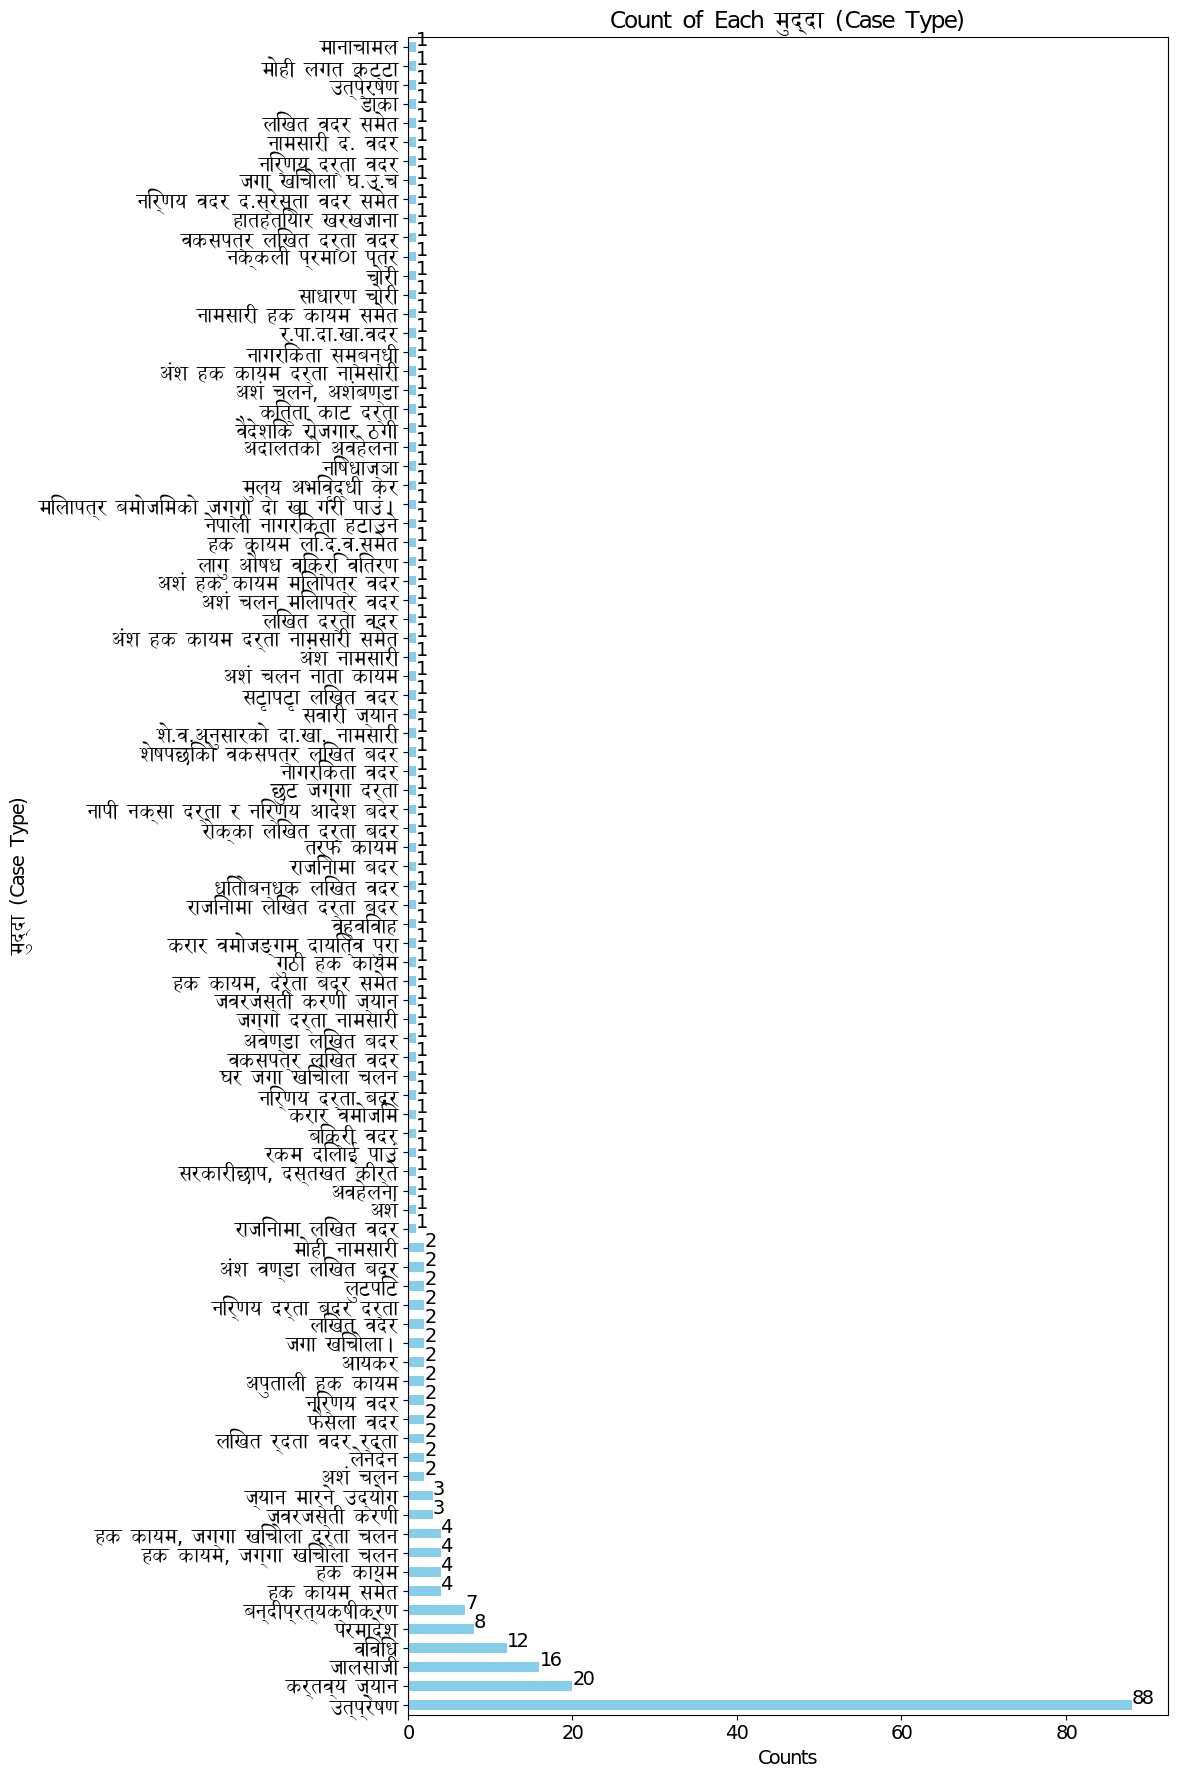

In [175]:

counts = df_clean_case['मुद्दा'].value_counts()

plt.figure(figsize=(12, 18))
counts.plot(kind='barh', color='skyblue') 
plt.title('Count of Each मुद्दा (Case Type)')
plt.xlabel('Counts')
plt.ylabel('मुद्दा (Case Type)')

for index, value in enumerate(counts):
    plt.text(value, index, str(value))

plt.tight_layout() 
plt.show()


<style>
@font-face {
    font-family: 'Kalimati';
    src: url('/home/oceanic/.local/share/fonts/kalamati.otf') format('opentype');
}
div.text_cell_render * {
    font-family: 'Kalimati' !important;
}
</style>
